# Prefiltering grid search - V genes

In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
from utils import *
from pathlib import Path
import pandas as pd
from Bio import SeqIO

In [4]:
RESULTS_PATH = Path("/home/bartosz/Documents/riot/results/")

In [4]:
ngs_skbio = pd.read_csv("data/skbio_stratified_ngs_alignment_v.csv", index_col=0)
print(f"Number of sequences with evalue more than 0.001: {ngs_skbio[ngs_skbio['e_value'] > 0.001].shape[0]} / {ngs_skbio.shape[0]}")
ngs_skbio = ngs_skbio[ngs_skbio["e_value"] < 0.001]
print(f"Number of sequences with target_alignment_len less than 100: {ngs_skbio[(ngs_skbio['t_end'] - ngs_skbio['t_start']) <= 100].shape[0]} / {ngs_skbio.shape[0]}")
ngs_skbio = ngs_skbio[(ngs_skbio["t_end"] - ngs_skbio["t_start"]) > 100]
ngs_skbio["target_id"] = ngs_skbio.apply(lambda row: (row["target_id"], row["rev_comp"]), axis=1)
ground_truth_df = ngs_skbio[["target_id"]]

Number of sequences with evalue more than 0.001: 26557 / 493705
Number of sequences with target_alignment_len less than 100: 12297 / 467148


## Results

### Top 12 matches

In [5]:
top_n = 12
PARAMS = ["top", "kmer_size", "distance_threshold", "modulo"]

In [8]:
results_dir = RESULTS_PATH / "skbio_stratified_ngs_alignment_grid_search_v"
res_df = aggregate_grid_search_results(results_dir,
                                       PARAMS,
                                       top_n,
                                       ground_truth_df,
                                       with_rev_comp=True)

100%|██████████| 225/225 [10:28<00:00,  2.79s/it]


,top,kmer_size,distance_threshold,modulo,match_percent
223,12,7,11,3,0.962432
95,12,7,9,3,0.962432
2,12,7,9,1,0.962097
166,12,7,11,1,0.961339
90,12,7,9,2,0.959993
135,12,7,11,2,0.959932
165,12,7,7,3,0.959112
128,12,7,9,4,0.958861
160,12,7,11,4,0.958644
158,12,7,13,4,0.957857


In [15]:
res_path = f"results/prefiltering_grid_search_top_{top_n}_no_trash_alignments_fixed_diagonal_stratified_ngs_v.csv"
res_df = pd.read_csv(res_path)
res_df.sort_values("match_percent", ascending=False).kmer_size.unique()

array([ 7,  9, 11, 13, 15])

### Top 15 matches

In [11]:
top_n = 15
PARAMS = ["top", "kmer_size", "distance_threshold", "modulo"]

In [13]:
results_dir = RESULTS_PATH / "skbio_stratified_ngs_alignment_grid_search_v"
res_df = aggregate_grid_search_results(results_dir,
                                       PARAMS,
                                       top_n,
                                       ground_truth_df,
                                       with_rev_comp=True)
res_path = f"results/prefiltering_grid_search_top_{top_n}_no_trash_alignments_fixed_diagonal_stratified_ngs_v.csv"
res_df.to_csv(res_path)
res_df.sort_values("match_percent", ascending=False).head(20)

100%|██████████| 225/225 [13:28<00:00,  3.59s/it]


,top,kmer_size,distance_threshold,modulo,match_percent
166,15,7,11,1,0.968790
223,15,7,11,3,0.968625
95,15,7,9,3,0.968583
2,15,7,9,1,0.968581
90,15,7,9,2,0.965894
135,15,7,11,2,0.965736
165,15,7,7,3,0.964958
128,15,7,9,4,0.964676
160,15,7,11,4,0.964435
158,15,7,13,4,0.963694


### Top 20 matches

In [14]:
top_n = 20
PARAMS = ["top", "kmer_size", "distance_threshold", "modulo"]

In [15]:
results_dir = RESULTS_PATH / "skbio_stratified_ngs_alignment_grid_search_v"
res_df = aggregate_grid_search_results(results_dir,
                                       PARAMS,
                                       top_n,
                                       ground_truth_df,
                                       with_rev_comp=True)
res_path = f"results/prefiltering_grid_search_top_{top_n}_no_trash_alignments_fixed_diagonal_stratified_ngs_v.csv"
res_df.to_csv(res_path)
res_df.sort_values("match_percent", ascending=False).head(20)

100%|██████████| 225/225 [20:10<00:00,  5.38s/it]


,top,kmer_size,distance_threshold,modulo,match_percent
2,20,7,9,1,0.976775
166,20,7,11,1,0.975906
95,20,7,9,3,0.975273
223,20,7,11,3,0.975260
135,20,7,11,2,0.974205
90,20,7,9,2,0.973295
165,20,7,7,3,0.971628
128,20,7,9,4,0.971364
160,20,7,11,4,0.971087
158,20,7,13,4,0.970294


## Bit score comparison: sk-bio ground truth vs prefiltered

In [9]:
v_gene_sequences = SeqIO.parse(open("data/genes/v_genes/v_genes.fasta"), 'fasta')
records = []
for record in v_gene_sequences:
    records.append({"v_call": record.id, "target_sequence": str(record.seq)})
v_gene_df = pd.DataFrame.from_records(records).set_index("v_call")

In [24]:
prefiltered_alignment = pd.read_csv("results/skbio_prefiltered_v_top_10_kmer_size_7_distance_threshold_9_modulo_3.csv", index_col=0)

In [25]:
bit_scores = ngs_skbio[["bit_score"]].join(prefiltered_alignment[["bit_score"]], rsuffix="_prefiltered", how="inner")
bit_scores["diff"] = bit_scores["bit_score"]- bit_scores["bit_score_prefiltered"]

In [26]:
bit_scores["diff"].describe()

count    454851.000000
mean          0.404423
std           3.086875
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max         169.314859
Name: diff, dtype: float64

In [27]:
bit_scores

,bit_score,bit_score_prefiltered,diff
sequence_id,,,
SRR13857054.957936,115.280087,115.280087,0.00000
SRR13857054.2385559,115.280087,115.280087,0.00000
SRR13857054.1016711,115.280087,115.280087,0.00000
SRR13857059.1159586,115.280087,115.280087,0.00000
SRR13857054.3198419,109.905012,60.633493,49.27152
...,...,...,...
SRR8266396.4947318,367.012761,367.012761,0.00000
SRR8365263.29274458,461.972417,461.972417,0.00000
SRR12175504.39449,385.825523,385.825523,0.00000


<Axes: ylabel='Frequency'>

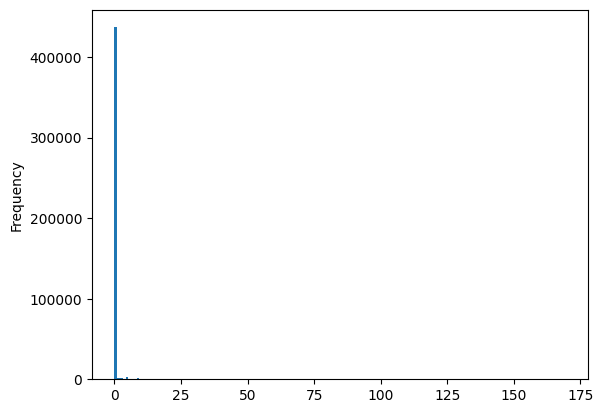

In [28]:
bit_scores["diff"].plot(kind='hist', bins=200, logy=False)

## Display mismatches

In [29]:
prefiltered_alignment = prefiltered_alignment.join(ground_truth_df, rsuffix="_true")

In [30]:
mismatch_df = prefiltered_alignment.query("target_id != target_id_true")

In [31]:
hist = []

In [33]:
bit_scores[bit_scores["diff"]>50].index

Index(['SRR13857058.3846386', 'SRR13857059.2269158', 'SRR13857057.957297',
       'SRR13857057.1286783', 'SRR13857054.1543597', 'SRR13857061.2011917',
       'SRR14126839.771515', 'SRR10362750.1237769', 'SRR9924569.1754412',
       'SRR8235272.3126914',
       ...
       'SRR747758.237653', 'SRR8283799.2595296', 'SRR7090070.1967060',
       'SRR4297396.98358', 'SRR8283792.9999831', 'SRR13857055.933864',
       'SRR13857055.246309', 'SRR11909843.111939', 'SRR8365261.365760',
       'SRR9924564.1013184'],
      dtype='object', name='sequence_id', length=204)

In [37]:
example=mismatch_df.loc[bit_scores[bit_scores["diff"]>50].index].iloc[2]
hist.append(example)
print("TRUE \n")
display_riot_alignment(ngs_skbio.loc[example.name])
print()
print("PREFILTERED \n")

display_riot_alignment(example)

TRUE 

ID: SRR13857057.957297
rev_comp: True

Riot: ('IGLV7-46*01_A213G', True)
t_start=0, t_end=277, len(target)=277, q_start=97, q_end=372, len(query)=275, cigar='131M3I1M1D8M2D15M3D8M1I1M1I7M1D2M2I89M2D6M', cigar_op_sum=284
seq_identity=0.6971830985915493
bit_score=115.28008724887904
e_value=5.052267843192239e-31
Target:  CAGGCTGTGGTGACTCAGGAGCCCTCACTGACTGTGTCCCCAGGAGGGACAGTCACTCTCACCTGTGGCTCCAGCACTGGAGCTGTCACCAGTGGTCATTATCCCTACTGGTTCCAGCAGAAGCCTGGCCA---AGCCCCCAGGACACTGATTTATGATACAAGCAACAAAC-A-CTCCTGGACG--CCTGCCCGGTTCTCAGGCTCCCTCCTTGGGGGCAAAGCTGCCCTGACCCTTTCGGGTGCGCAGCCTGAGGATGAGGCTGAGTATTACTGCTTGCTCT
         ||||||||X|||||||||||XX|XX||||X||XXXX||X||X||X|XX||||||||X|||||X|||X||||X||X|||||X|||||X||X|X|X||X|X|||X||X|||||X||||XX|X||X||X|XX||+++|-XX|X|X||--X||X||XXX||X|||---||||||X|+|+||||X||-X|++||||||X|X||||||||||||||XX||||X|X|||X||||||||X|||X|XX|X||X||X|||X|||||||||||||XXXX||||X|||--||||||
Query:   CAGGCTGTTGTGACTCAGGAATCTGCACTCACCACATCACCTGGTGAAACAGTCACACTCACTTGTCGCTCAAGTACTGGGGCTG